## Machine Translation

In order to be able to translate word from one language to another we need the `rotation matrix R` that would remap the `embeddings` of word in languade A to `embedings` of the same word in language B.
$$ XR = Y $$

$ Loss=||XR-Y||_F $

$ g=\frac{d}{dR}Loss $

$ R=R-\alpha g $

$$ ||A||_F = \sqrt{\sum \sum{|a_{ij}|^2}} $$

To make things easier we minimaze $ ||XR-Y||^2_F $ instead of $ ||XR-Y||_F $

### Transforming vectors

Vector transformations:
- Scaling
-Translation
- Rotation

Rotation changes th edirection of a vector leaving dimensionality and norm unaffected.

#### Rotation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R=np.array([[-2,0],[0,2]])
R

array([[-2,  0],
       [ 0,  2]])

In [3]:
X=np.array([[1,1]])
X

array([[1, 1]])

In [4]:
Y=np.dot(X,R)
Y

array([[-2,  2]])

(-4.0, 4.0)

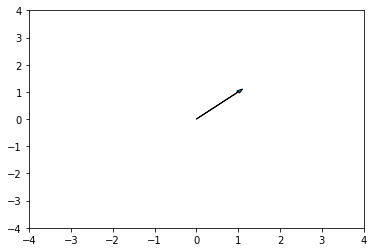

In [5]:
plt.arrow(0,0,X[0][0],X[0][1],head_width=0.1)
plt.xlim(-4,4)
plt.ylim(-4,4)

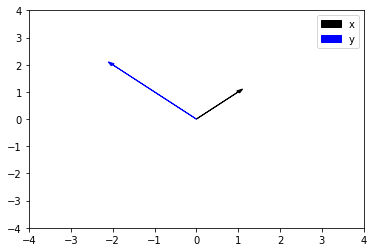

In [6]:
plt.arrow(0,0,X[0][0],X[0][1],head_width=0.1,color='black',label='x')
plt.arrow(0,0,Y[0][0],Y[0][1],head_width=0.1,color='b',label='y')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend()

Vector `X` is transformed into vector `Y`.

***

#### Rotation 2

Data that is composed of 2 real attributes belongs to a $ R \times R $ or $ R^2 $ space. Rotation matrices in $ R^2 $ rotate a given vector $\vec{x}$ by a counterclockwise angle $ \theta $ in a fixed coordinate system. Rotation matrices are of the form:

$$ Ro = \begin{bmatrix} cos{\theta} & -sin{\theta} \\ sin{\theta} & cos{\theta} \end{bmatrix}$$

$$ y=Ro \cdot x.T $$

To get the clockwise rotation use:

$$ y=x \cdot Ro $$

In [7]:
angle=100*(np.pi/180)

Ro=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
X=np.array([[2,2]])
Y=np.dot(Ro,X.T)
Y_clokcwise=np.dot(X,Ro)
print(f'Rotation matrix: \n{Ro}')
print(f'Rotated vector: \n{Y}')
print(f'Y_clokcwise vector: \n{Y_clokcwise}')
print('\n')
print(f'X norm: {np.linalg.norm(X)}')
print(f'Y norm: {np.linalg.norm(Y)}')
print(f'Y_clokcwise norm: {np.linalg.norm(Y_clokcwise)}')
print(f'Ro norm: {np.linalg.norm(Ro)}')

Rotation matrix: 
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]
Rotated vector: 
[[-2.31691186]
 [ 1.62231915]]
Y_clokcwise vector: 
[[ 1.62231915 -2.31691186]]


X norm: 2.8284271247461903
Y norm: 2.82842712474619
Y_clokcwise norm: 2.82842712474619
Ro norm: 1.414213562373095


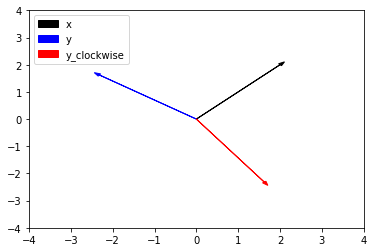

In [8]:
plt.arrow(0,0,X[0][0],X[0][1],head_width=0.1,color='black',label='x')
plt.arrow(0,0,Y[0][0],Y[1][0],head_width=0.1,color='b',label='y')
plt.arrow(0,0,Y_clokcwise[0][0],Y_clokcwise[0][1],head_width=0.1,color='r',label='y_clockwise')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend()

Points to note:
- `Norm` of the input `is the same` as the norm of the `output` vector. Rotation matrices `do not modify the norm` of the vector, only its direction.
- Norm of any $R^2$ rotation matrix is always $ \sqrt{2}=1,414 $

***

#### Forbenius Form

The Forbenius norm in the generalization to $$ R^2 $$ of the already knows norm function for vectors.

$$ ||\vec{x}|| = \sqrt{\vec{a} \cdot \vec{a}} $$

For a given $ R^2 $ matrix $A$, the forbenius norm is defined as:

$$ ||A||_F = \sqrt{\sum \sum{|a_{ij}|^2}} $$

In [18]:
A=np.array([[2,2],[2,2]])
A

array([[2, 2],
       [2, 2]])

In [19]:
A_squared=np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

In [20]:
A_squared=A*A
A_squared

array([[4, 4],
       [4, 4]])

In [21]:
A_forbenius=np.sqrt(np.sum(A_squared))
A_forbenius

4.0

In [22]:
print('Forbeniur norm of rotation matrix:')
print(np.sqrt(np.sum(Ro*Ro)),'==',np.linalg.norm(Ro))

Forbeniur norm of rotation matrix:
1.414213562373095 == 1.414213562373095


***

#### Hash Tables

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
pp=pprint.PrettyPrinter(indent=4)

In [10]:
def hash_function(value,n_buckets):
    '''
    Parameters:
    -----------
        value: int (the value of element)
        n_buckets: int (number of buckets)
    
    Returns:
    --------
        hash_value: int
    '''
    hash_value=int(value)%n_buckets
    
    return hash_value

In [11]:
def hash_table(value_l,n_buckets):
    '''
    Parameters:
    -----------
        value_l: list (list of integer numbers)
        n_buckets: int (number of buckets)
    
    Returns:
    --------
        hash_table: dict (dict of hash numbers as keys and elements as values)
    '''
    hash_table={i:[] for i in range(n_buckets)}
    for value in value_l:
        hash_value=hash_function(value,n_buckets)
        hash_table[hash_value].append(value)
    
    return hash_table

In [12]:
value_l=[100,10,97,14,17]
hash_table_ex=hash_table(value_l,n_buckets=10)
hash_table_ex

{0: [100, 10],
 1: [],
 2: [],
 3: [],
 4: [14],
 5: [],
 6: [],
 7: [97, 17],
 8: [],
 9: []}

In this case the bucket key must be the risghstmost digit of each number.

***

#### Planes

`Multiplanes hash functions` are other type of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the `intersection of n planes`. 

In [34]:
P=np.array([[1,1]])
v1_list=np.array([np.array(np.random.uniform(-2,2,2)) for i in range(0,10)])
side_od_plane=np.array([np.sign(np.dot(P,v1.T)) for v1 in v1_list])
colors=np.where(side_od_plane>0,'b','r')

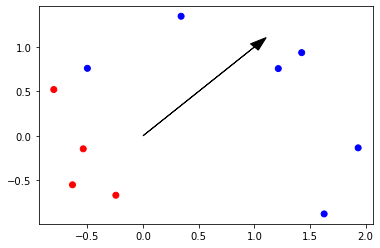

In [53]:
plt.scatter(v1_list[:,0],v1_list[:,1],color=colors.flatten())
plt.arrow(0,0,P[0][0],P[0][1],head_width=0.1,color='black',label='P')

Vector marks the 'positive' `direction` of the plane.

In order to plot the plane itself we need to ple a line perpendicular to vector `P`. It can be done by using $90^o$ `rotation matrix`.

In [63]:
P=np.array([[1,2]])
Plane=np.dot([[0,1],[-1,0]],P.T).T
v1_list=np.array([np.array(np.random.uniform(-2,2,2)) for i in range(0,20)])
side_od_plane=np.array([np.sign(np.dot(P,v1.T)) for v1 in v1_list])
colors=np.where(side_od_plane>0,'b','r')

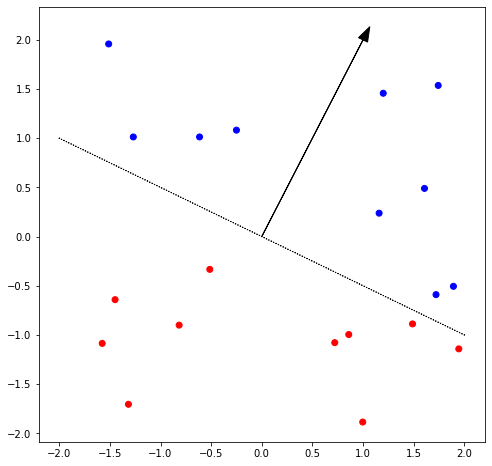

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(v1_list[:,0],v1_list[:,1],color=colors.flatten())
plt.arrow(0,0,P[0][0],P[0][1],head_width=0.1,color='black',label='P')
plt.arrow(0,0,Plane[0][0],Plane[0][1],color='black',linestyle=':')
plt.arrow(0,0,Plane[0][0]*-1,Plane[0][1]*-1,color='black',linestyle=':')

***

In [78]:
P=np.array([[1,1]]) # plane
V1=np.array([[1,2]]) #point
V2=np.array([[-1,1]]) #point
V3=np.array([[-2,-1]]) #point

In [80]:
np.dot(P,V1.T)

array([[3]])

In [83]:
np.dot(P,V2.T)

array([[0]])

In [84]:
np.dot(P,V3.T)

array([[-3]])

In [104]:
def side_of_plane(P,V):
    '''
    Parameters:
    -----------
        P: np.array (plane)
        V: np.array (point)
    Returns:
    --------
        sign_of_dot_scalar: int (side of the plane)
    '''
    dot=np.dot(P,V.T)
    sign_of_dot=np.sign(dot)
    sign_of_dot_scalar=sign_of_dot.item()
    
    return sign_of_dot_scalar

In [88]:
side_of_plane(P,V1)

1

In [89]:
side_of_plane(P,V2)

0

In [90]:
side_of_plane(P,V3)

-1

***

#### Hash function with multiple planes

In [91]:
P1=np.array([[1,1]]) # plane
P2=np.array([[-1,1]]) # plane
P3=np.array([[-1,-1]]) # plane
P_l=[P1,P2,P3]

V=np.array([[2,2]]) # vector to search

In [94]:
def hash_multi_plane(P_l,V):
    '''
    Parameters:
    -----------
        P_l: list of np.array (list of planes)
        V: np.array (vector)
    Returns:
    --------
        hash_value: int (hash_value of the vestor with respect to planes)
    '''
    hash_value=0
    for i,P in enumerate(P_l):
        sign=side_of_plane(P,V)
        hash_i=1 if sign>=0 else 0
        hash_value+=hash_i*2**i
    
    return hash_value

In [95]:
hash_multi_plane(P_l,V)

3

***

In [110]:
np.random.seed(0)
num_dimensions=2
num_planes=3
random_planes_matrix=np.random.normal(size=(num_planes,num_dimensions))
random_planes_matrix

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788]])

In [111]:
V=np.array([[2,2]])

In [112]:
def side_of_plane_matrix(P,V):
    '''
    Parameters:
    -----------
        P: np.array (plane)
        V: np.array (point)
    Returns:
    --------
        sign_of_dot_scalar: int (side of the plane)
    '''
    dot=np.dot(P,V.T)
    sign_of_dot=np.sign(dot)
    
    return sign_of_dot

In [113]:
sides_l=side_of_plane_matrix(random_planes_matrix,V)
sides_l

array([[1.],
       [1.],
       [1.]])

In [114]:
def hash_multi_plane_matrix(P,V):
    '''
    Parameters:
    -----------
        P: list of np.array (list of planes)
        V: np.array (vector)
        num_planes: int (number of planes)
    Returns:
    --------
        hash_value: int (hash_value of the vestor with respect to planes)
    '''
    sides_matrix=side_of_plane_matrix(P,V)
    hash_value=0
    for i in range(len(P)):
        sign=sides_matrix[i].item()
        hash_i=1 if sign>=0 else 0
        hash_value+=hash_i*2**i
    
    return hash_value

In [116]:
hash_multi_plane_matrix(random_planes_matrix,V)

7

***

#### Document vectors

Document can be represented as a vector by adding up word vectors for the words inside the document.

In [120]:
word_embedding={'I':np.array([1,0,1]),'love':np.array([-1,0,1]),'learning':np.array([1,0,1])}
words=['I','love','learning','test']
doc_embed=np.array([0,0,0])

for word in words:
    doc_embed+=word_embedding.get(word,0)

print(doc_embed)

[1 0 3]


***

## Naive Machine Translation

In [1]:
import pdb
import pickle
import string
import time
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords,twitter_samples
from os import getcwd

In [2]:
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
file_path=f'{getcwd()}/tmp/'
nltk.data.path.append(file_path)

#### Embeddings

Here embeddings are 300 dimensional arrays

In [4]:
en_embed=pickle.load(open('data/en_embeddings.p','rb'))
fr_embed=pickle.load(open('data/fr_embeddings.p','rb'))
print(f'Dict train length: {len(en_embed)}')
print(f'Dict test length: {len(fr_embed)}')

Dict train length: 6370
Dict test length: 5766


In [24]:
en_embed['car'][:10]

array([ 0.13085938,  0.00842285,  0.03344727, -0.05883789,  0.04003906,
       -0.14257812,  0.04931641, -0.16894531,  0.20898438,  0.11962891],
      dtype=float32)

In [25]:
fr_embed['voiture'][:10]

array([ 0.0161958 , -0.0558894 , -0.0246878 , -0.00492127, -0.134575  ,
       -0.0815104 , -0.0211033 , -0.159348  ,  0.00357712, -0.012855  ],
      dtype=float32)

#### Dictionaries eng-fr & fr-eng

In [5]:
def get_dict(file_name):
    '''
    Parameters:
    -----------
        file_name: string (name of the file to load data from)
    Returns:
    --------
        dictionary: dict (eng to fr dictionary)
    '''
    file=pd.read_csv(file_name,delimiter=' ')
    dictionary={}
    for i in range(len(file)):
        en=file.loc[i][0]
        fr=file.loc[i][1]
        dictionary[en]=fr
        
    return dictionary

In [6]:
eng_fr_train=get_dict('data/en-fr.train.txt')
eng_fr_test=get_dict('data/en-fr.test.txt')
print(f'Dict train length: {len(eng_fr_train)}')
print(f'Dict test length: {len(eng_fr_test)}')

Dict train length: 5000
Dict test length: 1500


In [28]:
eng_fr_train['car']

'voiture'

#### Transform Matrices

In [7]:
def get_matrices(en_fr,en_embed,fr_embed):
    '''
    Parameters:
    -----------
        en_fr: dict (eng to fr dictionary)
        en_embed: dict (dictionary with eng words and embeddings as values)
        fr_embed: dict (dictionary with fr words and embeddings as values)
    Returns:
    --------
        X: array (matrix where columns are eng embeddings)
        Y: array (matrix where columns are fr embeddings, order corresponding to X)
        R: array (projection matrix that minimizes F norm ||XR-Y||^2)
    '''
    x=[]
    y=[]
    words_en=set([word for word in en_embed.keys()])
    words_fr=set([word for word in fr_embed.keys()])
    
    for word_en,word_fr in en_fr.items():
        if word_en in words_en and word_fr in words_fr:
            x.append(en_embed[word_en])
            y.append(fr_embed[word_fr])
    
    X=np.array(x)
    Y=np.array(y)
    
    return X,Y

In [8]:
X_train,Y_train=get_matrices(eng_fr_train,en_embed,fr_embed)

***

#### Translations

Given English and French word embeddings dictionaries one can create a transformation matrix R. 
- given english word embedding **e** can be multiplied **rR** to get a new word wmbedding **f**
- we can compute nearest neighbours to **f** in the french embeddings and recommnd the word that is most similar to the transformed word embedding

Find matrix `R` that minimizes following equation:

$$ \arg \min _{\mathbf{R}}\| \mathbf{X R} - \mathbf{Y}\|_{F}\tag{1} $$

`Forbenius norm`:

$$ \|\mathbf{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} \left|a_{i j} \right|^{2}} \tag{2} $$

`Actual loss function:`

$$ ||XR - Y ||_F $$

is often replaced by:

$$ \frac{1}{m} ||XR - Y ||_F^2 $$

where m is number of examples.

Taking square is easier to compute the gradient of squared Frobenius.

***

#### compute_loss

The loss will be squared Forbenius norm of difference between matrix and its approximation divided by the number of trainin examples **m**.

$$ L(X,Y,R) = \frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{n} (a_{i j})^2$$

where $a_{i j}$ is value in ith row and jth column of the matrix **XR-Y**

In [9]:
def compute_loss(X,Y,R):
    '''
    Parameters:
    -----------
        X: array(m,n) (matrix where columns are eng embeddings)
        Y: array(m,n) (matrix where columns are fr embeddings, order corresponding to X)
        R: array(n,n) (transformation matrix from eng to fr vector space embed)
    Returns:
    --------
        loss: array(m,n) (value of the loss for Y,X and R)
    '''
    m=len(X)
    diff=np.dot(X,R)-Y
    loss=np.sum(diff**2)/m
    
    return loss

In [32]:
np.random.seed(123)
m=10
n=5
X=np.random.rand(m,n)
Y=np.random.rand(m,n)*0.1
R=np.random.rand(n,n)
print(f'Loss: {compute_loss(X,Y,R)}')

Loss: 8.186626624823763


***

#### compute_gradient

$$ \frac{d}{dR} L(X,Y,R) = \frac{d}{dR}\Big(\frac{1}{m}||XR-Y||_F^2 \Big) = \frac{2}{m}X^T(XR-Y) $$

In [33]:
def compute_gradient(X,Y,R):
    '''
    Parameters:
    -----------
        X: array(m,n) (matrix where columns are eng embeddings)
        Y: array(m,n) (matrix where columns are fr embeddings, order corresponding to X)
        R: array(n,n) (transformation matrix from eng to fr vector space embed)
    Returns:
    --------
        g: float (gradient of the loss for Y,X and R)
    '''
    m=len(X)
    diff=np.dot(X,R)-Y
    g=np.dot(X.T,diff)*2/m
    
    return g

In [34]:
np.random.seed(123)
m=10
n=5
X=np.random.rand(m,n)
Y=np.random.rand(m,n)*0.1
R=np.random.rand(n,n)
print(f'Gradient matrix: \n{compute_gradient(X,Y,R)}')

Gradient matrix: 
[[1.3498175  1.11264981 0.69626762 0.98468499 1.33828969]
 [1.48402939 1.3134471  0.8269311  1.27307285 1.44181639]
 [1.57868759 1.3817686  0.89039471 1.35293657 1.60202282]
 [1.50368303 1.27421294 0.8258529  1.16996514 1.54811674]
 [1.72780859 1.41902443 0.90765656 1.31399276 1.73329241]]


***

#### align_embeddings

In [35]:
def align_embeddings(X,Y,steps=100,alpha=0.0003):
    '''
    Parameters:
    -----------
        X: array(m,n) (matrix where columns are eng embeddings)
        Y: array(m,n) (matrix where columns are fr embeddings, order corresponding to X)
        steps: int (number of learning steps)
        alpha: float (learning rate)
    Returns:
    --------
        R: array (n,n) (projection matrix that minimizes F norm ||XR-Y||^2)
    '''
    np.random.seed(129)
    n=X.shape[1]
    R=np.random.rand(n,n)
    for i in range(steps):
        if i%25==0:
            print(f'Loss: {compute_loss(X,Y,R):.4f}')
        dR=compute_gradient(X,Y,R)
        R-=alpha*dR
    
    return R

In [36]:
np.random.seed(129)
m=10
n=5
X=np.random.rand(m,n)
Y=np.random.rand(m,n)*0.1
R=align_embeddings(X,Y)

Loss: 3.7242
Loss: 3.6283
Loss: 3.5350
Loss: 3.4442


In [37]:
R_train=align_embeddings(X_train,Y_train,steps=400,alpha=0.8)

Loss: 963.0146
Loss: 97.8292
Loss: 26.8329
Loss: 9.7893
Loss: 4.3776
Loss: 2.3281
Loss: 1.4480
Loss: 1.0338
Loss: 0.8251
Loss: 0.7145
Loss: 0.6534
Loss: 0.6185
Loss: 0.5981
Loss: 0.5858
Loss: 0.5782
Loss: 0.5735


***

### Testing the translation

#### kNN

`k-NN` is a method that takes as input a vector and finds other vectors in dataset that are `closest to it.` 'k' is the number of 'nearest neighbours' to find.

#### Searching the transation embedding

Since we approximate the transaltion function from English to French embeddings by a linear transformation matrix **R**, most of the time it won't bring the exact embedding of the French word when we transform embedding **e** of some particular English word into the French embadding space.
- That is why k-NN is so usefull. By using 1-NN wirh **eR** as input we can search for an embedding f in matrix **Y** which is the closest to transformed vector **eR**.

#### Cosine similarity

Cosine similarity between vectors **u** and **v** calculated as the cosine of the angle between them:

$$ cos(u,v) = \frac{u \cdot v}{||u|| ||v||} $$

- $cos(u,v) = 1$ ih **u** and **v** lie in the same line and point to the same direction
- $cos(u,v) = -1$ when they have exactly opposite directions
- $cos(u,v) = 0$ when the vectors are orthogonal (perpendicular)

`Cosine similarity and distance are pretty opposite things:`
- cosine similaity can't be used as the distance metric
- when cosine similarity increases towards 1, distance between two vectors decreases (towards 0)
- we can define cosine distance between **u** and **v** as:
$$ d_{cos}(u,v) = 1=cos(u,v) $$

In [19]:
def cosine_similarity(A,B):
    '''
    Parameters:
    -----------
        A: np array (word vector)
        B: np array (word vector)
    Returns:
    --------
        cos: float (cosine similarity between A and B)
    '''
    dot = np.dot(A,B)
    norm_a=np.linalg.norm(A)
    norm_b=np.linalg.norm(B)
    cos=dot/(norm_a*norm_b)
    return cos

In [20]:
def nearest_neighbor(v,candidates,k=1):
    '''
    Parameters:
    -----------
        v: array (vector to find the neighbour for)
        candidates: array (set of neighbour vectors)
        k: int (top k nearest neighbours)
    Returns:
    --------
        k_idx: list (index of top k closes nbhd)
    '''
    similarity=[]
    for vector in candidates:
        sim=cosine_similarity(v,vector)
        similarity.append(sim)
    index_min=np.argsort(similarity)
    k_idx=index_min[::-1]
    return k_idx[:k]

In [40]:
v=np.array([1,0,1])
candidates=np.array([[1,0,5],[-2,5,3],[2,0,1],[6,-9,5],[9,9,9]])
print(candidates[nearest_neighbor(v,candidates,k=3)])

[[2 0 1]
 [1 0 5]
 [9 9 9]]


***

### Vocabulary

In [41]:
def test_vocabulary(X,Y,R):
    '''
    Parameters:
    -----------
        X: array(m,n) (matrix where columns are eng embeddings)
        Y: array(m,n) (matrix where columns are fr embeddings, order corresponding to X)
        R: array(n,n) (transformation matrix from eng to fr vector space embed)
    Returns:
    --------
        accuracy: float (accuracy)
    '''
    pred=np.dot(X,R)
    m=len(pred)
    correct=0
    for i in range(m):
        pred_idx=nearest_neighbor(pred[i],Y,k=1)
        if pred_idx==i:
            correct+=1
    accuracy=correct/m
    
    return accuracy

In [42]:
X_test,Y_test=get_matrices(eng_fr_test,en_embed,fr_embed)

In [43]:
acc=test_vocabulary(X_test,Y_test,R_train)
print(f'Accuracy: {acc}')

Accuracy: 0.5570236439499304


***

## LSH and Document search

Locality sessitive hashing.

### Bag-of-words Document Models

The documents are sqeuences of words:
- `Ordering` of words matters.
- Igroning order can be efficient for some models.
- Document embeddings created by `summing embeddings of all words` in the document.
- Words with unknown embeddings are `ignored.`

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [11]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')
tweets=positive_tweets+negative_tweets

In [12]:
def process_tweet(tweet):
    """
    Parameters:
    -----------
        tweet: string
        
    Returns:
    --------
        tweet_stem: list of stemmed words in tweet
    """
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    stopwords_english=stopwords.words('english')
    stemmer=PorterStemmer()
    
    tweet=re.sub(r'https://[^\s\n\r]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet_tokenized=tokenizer.tokenize(tweet)
    
    tweet_clean=[]
    for word in tweet_tokenized:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(word)
    
    tweet_stem=[]
    for word in tweet_clean:
        stem_word=stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [13]:
def get_doc_embed(tweet,embeddings):
    '''
    Parameters:
    -----------
        tweet: str (tweet to be processed)
        embeddings: dist (dict with pairs word: embedding)
    Returns:
    --------
        doc_embed: array (embedding of all doc)
    '''
    doc_embed=np.zeros(300)
    words=process_tweet(tweet)
    for word in words:
        doc_embed+=embeddings.get(word,np.zeros(300))
    
    return doc_embed

In [14]:
tweet='RT @Twitter @champagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np'
tweet_embed=get_doc_embed(tweet,en_embed)
tweet_embed[-5:]

array([-0.00268555, -0.15378189, -0.55761719, -0.07216644, -0.32263184])

In [15]:
def get_doc_vecs(all_docs,embeddings):
    '''
    Parameters:
    -----------
        all_docs: list (list of tweets)
        embeddings: dist (dict with pairs word: embedding)
    Returns:
    --------
        doc_vec_matrix: array (array of embeddings)
        ind2doc_dict: dict (dict with indices of tweets in vec and their embeddings as the values)
    '''
    ind2doc_dict=dict()
    doc_vec_matrix=[]
    for i,tweet in enumerate(all_docs):
        vec=get_doc_embed(tweet,embeddings)
        doc_vec_matrix.append(vec)
        ind2doc_dict[i]=vec
    doc_vec_matrix=np.vstack(doc_vec_matrix)
    
    return doc_vec_matrix, ind2doc_dict

In [65]:
doc_vecs,ind2tweet=get_doc_vecs(tweets,en_embed)
print(f'Length of dict: {len(ind2tweet)}')
print(f'Shape of doc_vecs: {doc_vecs.shape}')

Length of dict: 10000
Shape of doc_vecs: (10000, 300)


#### Looking for similar tweets

In [17]:
custom_tweet='I am sad and depressed'
process_tweet(custom_tweet)
tweet_embed=get_doc_embed(custom_tweet,en_embed)

In [21]:
idx=np.argmax(cosine_similarity(doc_vecs,tweet_embed))
print(tweets[idx])

@zoeeylim sad sad sad kid :( it's ok I help you watch the match HAHAHAHAHA


### Finding most similar tweet with LSH

Instead of lookin at all vectors, one can seach just a subset to find its nearest neighbors.

In [22]:
n_vecs=doc_vecs.shape[0]
n_dims=doc_vecs.shape[1]
print(f'{n_vecs} vectors \n{n_dims} dimensions each')

10000 vectors 
300 dimensions each


#### Choosing the number of planes

- Each plane divides space to 2 parts.
- **n** planes divide space into $2^n$ hash buckets.
- We want to organize 10000 document vectors into buckets so that every bucket has about 16 vectors.
- For that we need $\frac{10000}{16}=625$ buckets
- Therefore $2^n=625$, then $n=log_{2}625 \approx 10$

In [77]:
n_planes=10
n_universes=25 #number of times to repeat hashing to improve search

### Getting Hash Number for a Vector

Each vector has to have a unique number associated to it in order to assign it to as "hash bucket"

#### Hyperplanes in vector spaces
- in 3D vector space, the hyperplane is a regular plane, in 2D vector space hyperplane is a line
- hyperplane is a subspace with a `dimension 1 lower than original vector space`
- hyperplane is uniquely defined by its `normal vector`
- Normal vector **v** of the plane $\pi$ is the vector to which all vectors in the plane $\pi$ are orthogonal

#### Hyperplane split Vector Spaces
- all vectors whose `dot product` with plane's `normal vector` is positive are on the one side of the plane
- all vectors whose `dot product` with plane's `normal vector` is negative are on the other side of the plane

#### Encoding Hash Buckets
- for a `vector` we can take its `dot product` with all the planes and encode this information to assign the vector to a single `hash bucket`
- when the vector is pointing to the `opposite` side of the hyperplane then normal, encode it by `0`
- when the vector is pointing to the `same` side of the hyperplane then normal, encode it by `1`
- if you calculate the `dot product` with each plane in the same order for every vector, you've encoded each vector's unique hash ID as a binary number, like [0,1,0,0,1,1,...,0]

$$ hash = \sum_{i=0}^{N-1}(2^i \times h_i) $$

In [24]:
np.random.seed(0)
planes_l=[np.random.normal(size=(n_dims,n_planes)) for _ in range(n_universes)]

In [25]:
def vector_hash_value(v,planes):
    '''
    Parameters:
    -----------
        v: array (1,n) (vector of tweet)
        planes: array (n,m) (set of planes that divide the region)
    Returns:
    --------
         res: float (hash number)
    '''
    dot_product=np.dot(v,planes)
    h=[1 if i>=0 else 0 for i in dot_product]
    hash_value=0
    n_planes=planes.shape[1]
    for i in range(n_planes):
        hash_value+=2**i*h[i]
    hash_value=int(hash_value)
    
    return hash_value

In [110]:
np.random.seed(0)
idx=0
planes=planes_l[idx]
v=np.random.rand(1,300)
hash_value=vector_hash_value(v,planes)
print(f'Hash value to vector v and set of planes planes at index {idx} is {hash_value}')

Hash value to vector v and set of planes planes at index 0 is 768


#### Creating Hash Table

In [71]:
def make_hash_table(vecs,planes):
    '''
    Parameters:
    -----------
        vecs: list (list of np .array vectors to be hashed)
        planes: array (matrix of planes in a singe "universe" with shape (embedding_dimensions,number_of_planes))
    Returns:
    --------
        hash_table: dict (kays are hashes and values are lists of vectors)
        id_table: dict (keys are hashes and values are lists of vector id)
    '''
    num_planes=planes.shape[1]
    num_buckets=2**num_planes
    hash_table={i: [] for i in range(num_buckets)}
    id_table={i: [] for i in range(num_buckets)}
    
    for i,v in enumerate(vecs):
        h=vector_hash_value(v,planes)
        
        hash_table[h].append(v)
        id_table[h].append(i)
    
    return hash_table, id_table

In [73]:
idx=0
planes=planes_l[0]
tmp_hash_table,tmp_id_table=make_hash_table(doc_vecs,planes)
print(f'hash table at key 0 has {len(tmp_hash_table[1])} document vectors')
print(f'id table at key 0 has {len(tmp_id_table[1])} document indices')
print(f'first 5 doc indices at key 0: {id_table[1][0:5]} document vectors')

hash table at key 0 has 1 document vectors
id table at key 0 has 1 document indices
first 5 doc indices at key 0: [8701] document vectors


#### All Hash Tables

In [79]:
def create_hash_id_tables(n_universes):
    hash_tables=[]
    id_tables=[]
    for universe_id in range(n_universes):
        print(f'hash universe #: {universe_id}')
        planes=planes_l[universe_id]
        hash_table,id_table=make_hash_table(doc_vecs,planes)
        hash_tables.append(hash_table)
        id_tables.append(id_tables)
    
    return hash_tables, id_tables

In [80]:
hash_tables, id_tables=create_hash_id_tables(n_universes)

hash universe #: 0
hash universe #: 1
hash universe #: 2
hash universe #: 3
hash universe #: 4
hash universe #: 5
hash universe #: 6
hash universe #: 7
hash universe #: 8
hash universe #: 9
hash universe #: 10
hash universe #: 11
hash universe #: 12
hash universe #: 13
hash universe #: 14
hash universe #: 15
hash universe #: 16
hash universe #: 17
hash universe #: 18
hash universe #: 19
hash universe #: 20
hash universe #: 21
hash universe #: 22
hash universe #: 23
hash universe #: 24


#### Approximate knn

In [86]:
def approximate_knn(doc_id,v,planes,hash_tables,id_tables,k=1,n_universes=25):
    vecs=[]
    ids=[]
    ids_set=set()
    
    for universe_id in range(n_universes):
        planes=planes_l[universe_id]
        hash_table=hash_tables[universe_id]
        id_table=id_tables[universe_id]
        
        hash_value=vector_hash_value(v,planes)
        doc_vecs_l=hash_table[hash_value]
        new_ids=id_table[hash_value]
        
        for i,new_id in enumerate(new_ids):
            if doc_id==new_id:
                continue
            
            if new_id not in ids_set:
                doc_vec_at_i=doc_vecs_l[i]
                vecs.append(doc_vec_at_i)
                ids.append(new_id)
                ids_set.add(new_id)
    print(f'Fast consideering {len(vecs)} vecs')
    vecs_arr=np.array(vecs)
    nearest_neighbor_idx=nearest_neighbor(v,vecs_arr,k=k)
    nearest_neighbor_ids=[ids[idx] for idx in nearest_neighbor_idx]
    
    return nearest_neighbor_ids

In [87]:
doc_id=0
doc_to_search=tweets[doc_id]
vec_to_search=doc_vecs[doc_id]

In [93]:
#naerest_neighbor_ids=approximate_knn(doc_id,vec_to_search,planes_l,hash_tables,id_tables,k=3,n_universes=5)

In [94]:
#id_tables[5]